In [1]:
# Step 2: Importing Libraries

from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from nltk.tokenize.punkt import PunktSentenceTokenizer
from nltk.corpus import stopwords
from collections import Counter

# Download necessary NLTK datasets (only needed once)
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('averaged_perceptron_tagger')
# All the above NLTK datasets were downloaded offline through the terminal.

# Set seaborn style
sns.set()

In [3]:
# Step 3: Load the Twentieth-Century Events Text

with open("20th_century_events.txt", "r", encoding="utf-8", errors='ignore') as file:
    text = file.read().replace('\n', ' ')

In [5]:
# Step 4: Tokenize the Sentences and Words Manually
# As the mentioned in the tokenizers readme file

# Load Punkt tokenizer manually
tokenizer = PunktSentenceTokenizer()

In [7]:
# Tokenize sentences
sentences = tokenizer.tokenize(text)

In [9]:
# Tokenize words manually by splitting sentences
tokens = []
for sent in sentences:
    words = sent.split()
    tokens.extend(words)

In [11]:
# Frequency Distribution of All Tokens
freq_dist = nltk.FreqDist(tokens)
top_10_tokens = freq_dist.most_common(10)

In [13]:
# Create DataFrame and Plot
words_df = pd.DataFrame(top_10_tokens, columns=["Word", "Frequency"])

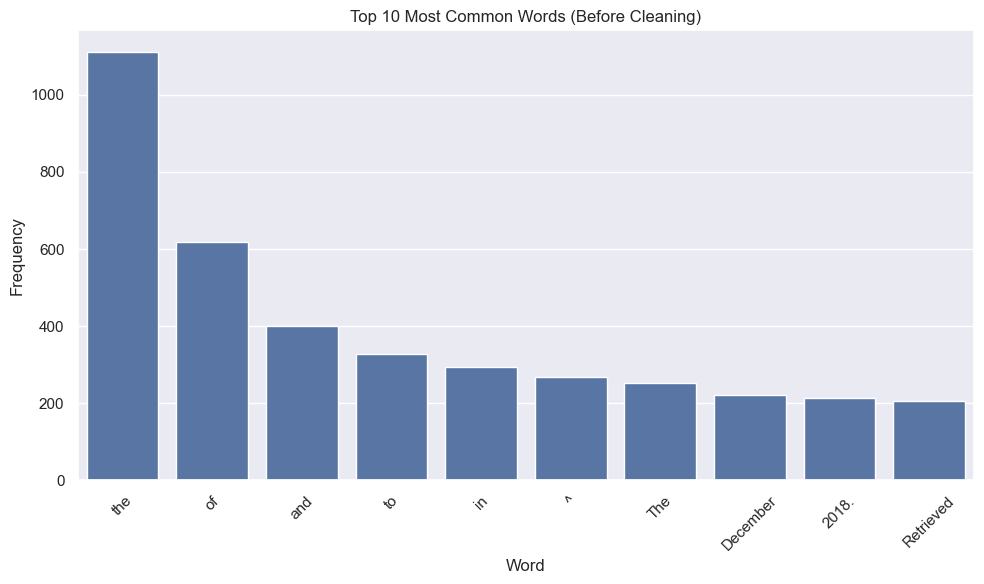

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x="Word", y="Frequency", data=words_df)
plt.title("Top 10 Most Common Words (Before Cleaning)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Step 5: Remove Stop Words and Punctuation

stop_words = set(stopwords.words('english'))

cleaned_tokens = [
    word.lower() for word in tokens
    if word.isalpha() and word.lower() not in stop_words
]

In [19]:
# Frequency Distribution after Cleaning
cleaned_freq_dist = nltk.FreqDist(cleaned_tokens)
top_10_cleaned = cleaned_freq_dist.most_common(10)

In [21]:
# Create DataFrame and Plot
cleaned_words_df = pd.DataFrame(top_10_cleaned, columns=["Word", "Frequency"])

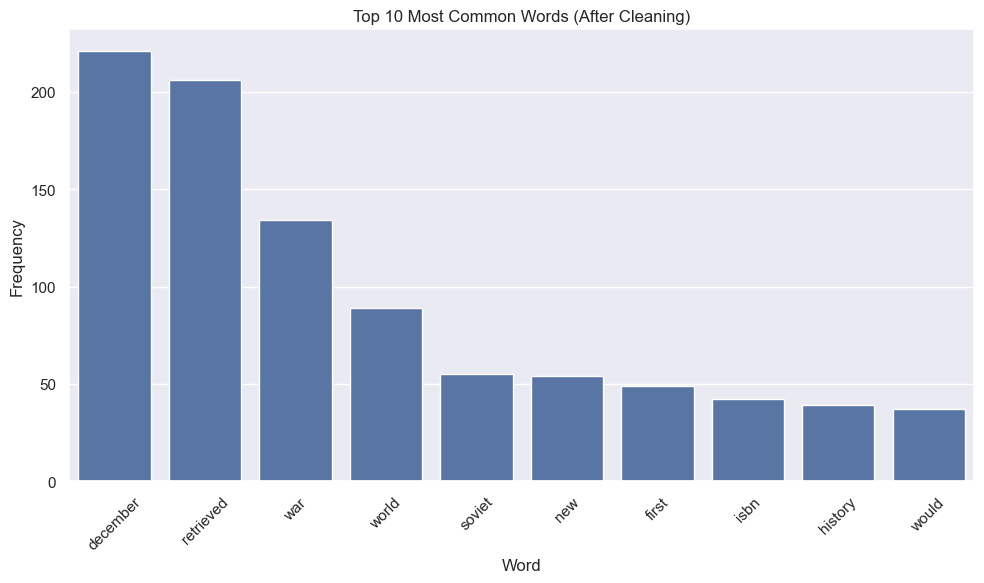

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x="Word", y="Frequency", data=cleaned_words_df)
plt.title("Top 10 Most Common Words (After Cleaning)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Step 5: Comment on Observations

#### Observation:
Before cleaning, common words like 'the', ',', and 'of' dominated the frequency plot.

After cleaning, more meaningful words related to historical events (e.g., war, soviet, germany) became prominent, providing clearer insights into the article's topics.


In [26]:
# Point NLTK to look in your project folder
##import nltk

# Optional downloads if needed (only once)
#nltk.download('punkt', download_dir='/Users/samarjitgehdu/Documents/Achievement 1/20th-century/nltk_data')
#nltk.download('wordnet', download_dir='/Users/samarjitgehdu/Documents/Achievement 1/20th-century/nltk_data')
#nltk.download('brown', download_dir='/Users/samarjitgehdu/Documents/Achievement 1/20th-century/nltk_data')
#nltk.download('averaged_perceptron_tagger', download_dir='/Users/samarjitgehdu/Documents/Achievement 1/20th-century/nltk_data')

# Make sure NLTK looks into your project nltk_data folder
#nltk.data.path.append('/Users/samarjitgehdu/Documents/Achievement 1/20th-century/nltk_data')

##from textblob import download_corpora
##download_corpora.download_all()

In [30]:
# Step 6: Create a Tags List using TextBlob
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
blob = TextBlob(' '.join(cleaned_tokens))
tags = blob.tags


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/samarjitgehdu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/samarjitgehdu/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [32]:
# Step 7: Create a List of Top 10 POS Tags

tag_counts = Counter(tag for word, tag in tags)
top_10_tags = tag_counts.most_common(10)

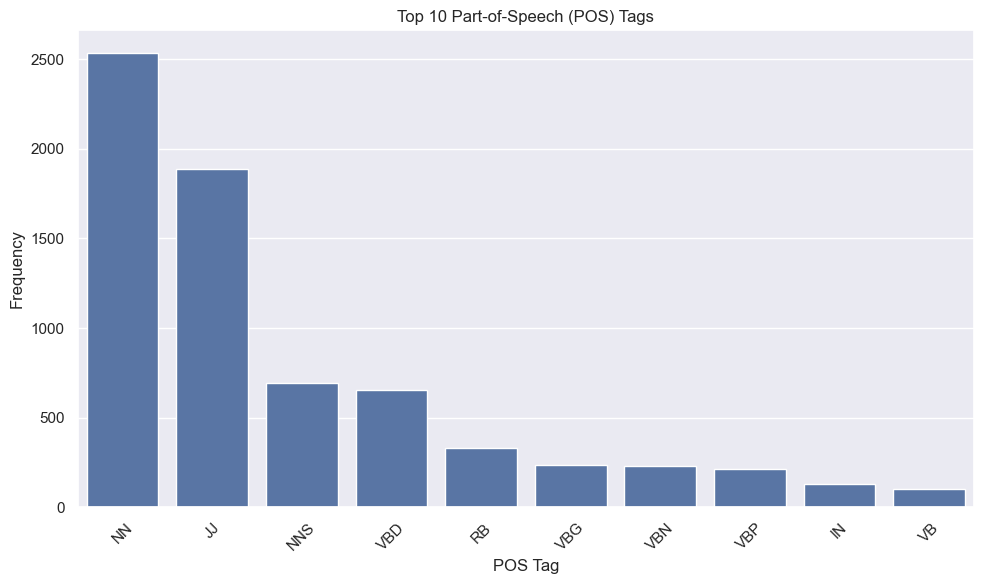

In [47]:
# Step 8: Convert to DataFrame and Plot
pos_df = pd.DataFrame(top_10_tags, columns=["POS Tag", "Frequency"])

plt.figure(figsize=(10,6))
sns.barplot(x="POS Tag", y="Frequency", data=pos_df)
plt.title("Top 10 Part-of-Speech (POS) Tags")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [49]:
# Step 9: Create Bar Plots for Nouns, Verbs, and Adjectives

# Filter tags
nouns = [word for word, tag in tags if tag.startswith('NN')]
verbs = [word for word, tag in tags if tag.startswith('VB')]
adjectives = [word for word, tag in tags if tag.startswith('JJ')]

In [51]:
# Create frequency distributions
noun_freq = Counter(nouns).most_common(15)
verb_freq = Counter(verbs).most_common(15)
adjective_freq = Counter(adjectives).most_common(15)

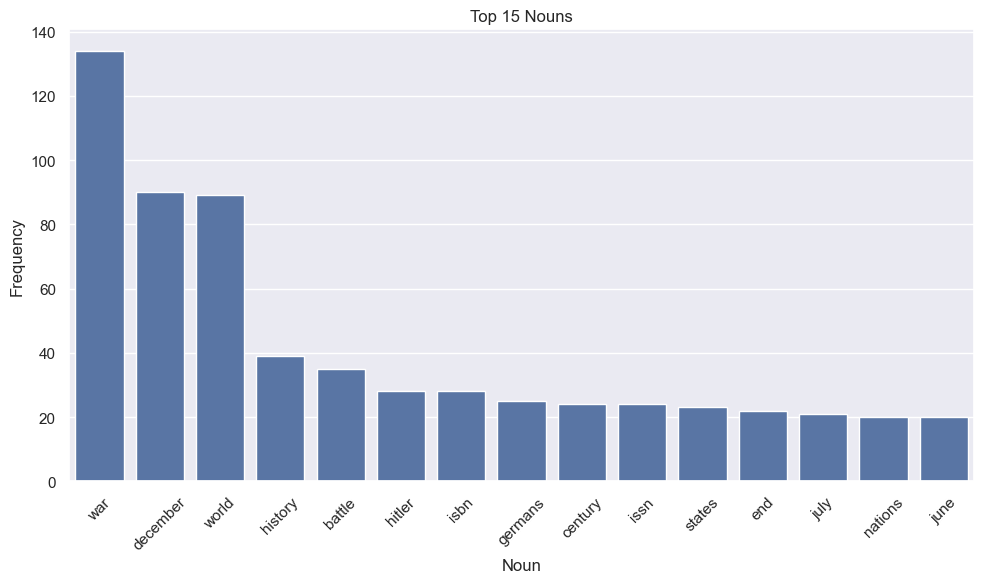

In [53]:
# Plot Nouns
noun_df = pd.DataFrame(noun_freq, columns=["Noun", "Frequency"])
plt.figure(figsize=(10,6))
sns.barplot(x="Noun", y="Frequency", data=noun_df)
plt.title("Top 15 Nouns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

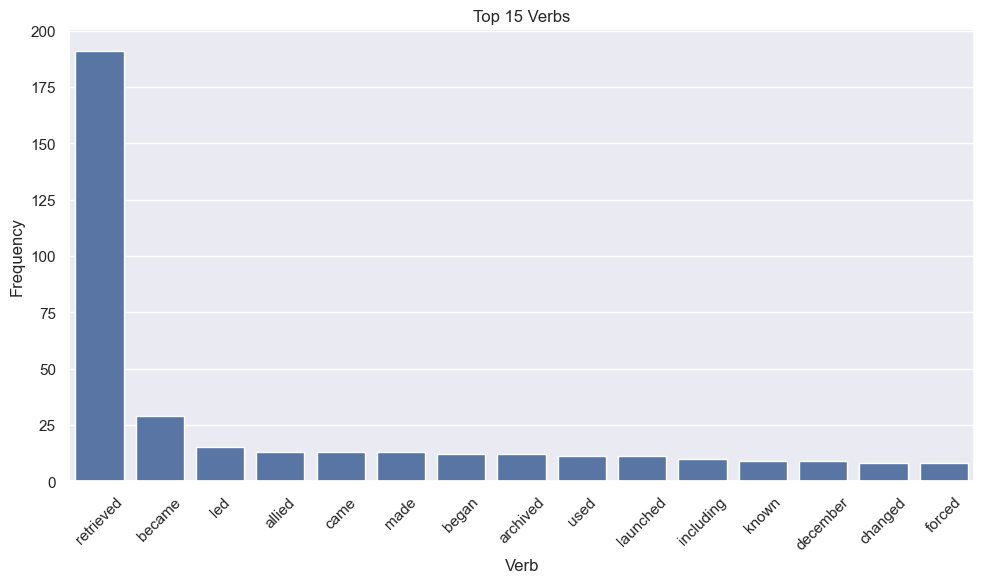

In [55]:
# Plot Verbs
verb_df = pd.DataFrame(verb_freq, columns=["Verb", "Frequency"])
plt.figure(figsize=(10,6))
sns.barplot(x="Verb", y="Frequency", data=verb_df)
plt.title("Top 15 Verbs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

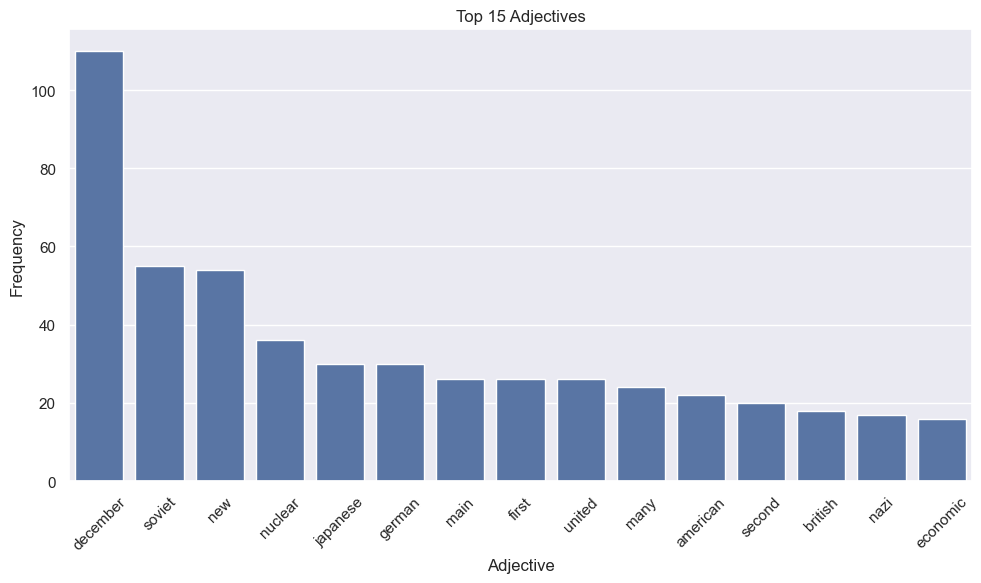

In [57]:
# Plot Adjectives
adjective_df = pd.DataFrame(adjective_freq, columns=["Adjective", "Frequency"])
plt.figure(figsize=(10,6))
sns.barplot(x="Adjective", y="Frequency", data=adjective_df)
plt.title("Top 15 Adjectives")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Step 9: Comment on Observations

#### Observation:
The frequency of nouns is dominated by historical terms and country names, reflecting the article's focus.
The verbs highlight key actions (e.g., "declared", "signed", "began") relevant to historical events.
Adjectives are fewer but emphasize descriptors used to characterize events and periods.
"""

In [60]:
# Step 10: Create a DataFrame of Country Mentions

# Define country lookup list (sample; replace with your actual list if needed)
countries = [
    'United States', 'Germany', 'France', 'Russia', 'Japan', 'Italy', 'China', 'United Kingdom',
    'India', 'Australia', 'Canada', 'Mexico', 'South Africa', 'Brazil', 'Argentina'
]

In [62]:
# Count country mentions
country_mentions = {}
text_lower = text.lower()
for country in countries:
    count = text_lower.count(country.lower())
    country_mentions[country] = count

In [64]:
print("Country Mentions List:")
for country, count in country_mentions.items():
    print(f"{country}: {count}")

Country Mentions List:
United States: 23
Germany: 42
France: 17
Russia: 18
Japan: 69
Italy: 14
China: 12
United Kingdom: 2
India: 12
Australia: 6
Canada: 2
Mexico: 1
South Africa: 3
Brazil: 0
Argentina: 0


In [66]:
# Create DataFrame
country_df = pd.DataFrame(list(country_mentions.items()), columns=['Country', 'Mentions'])
country_df = country_df.sort_values(by='Mentions', ascending=False)

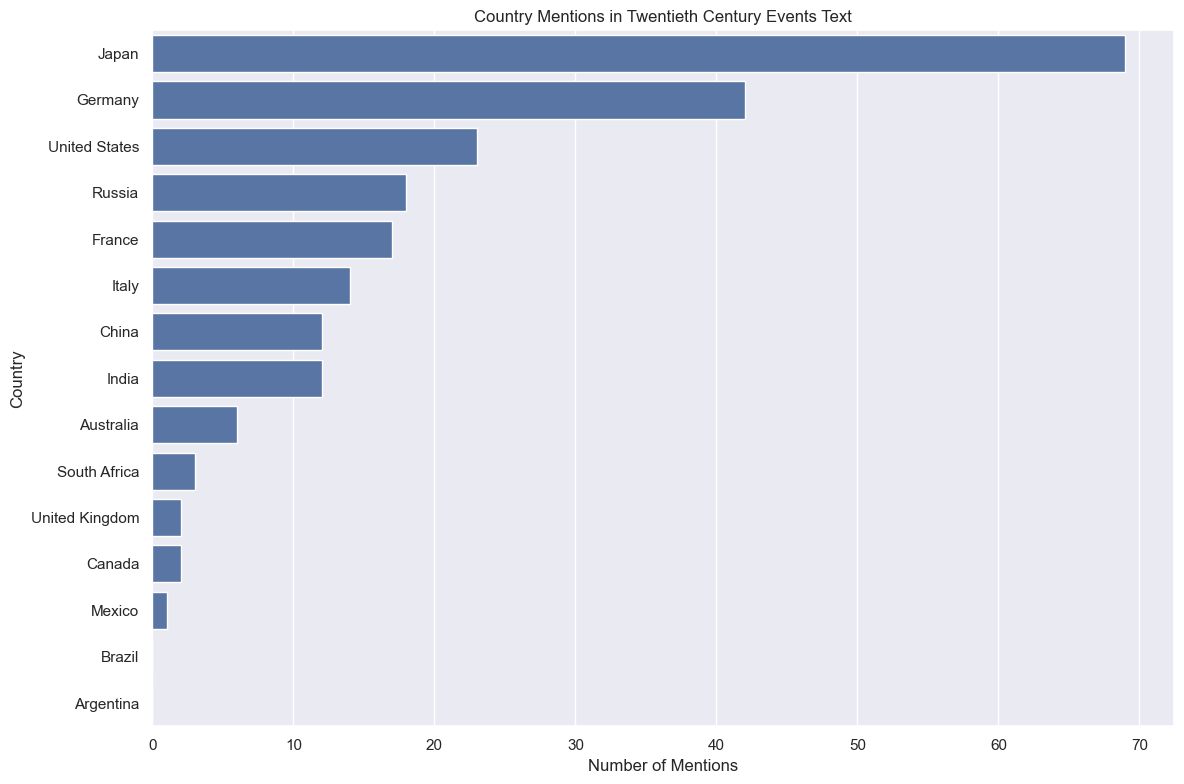

In [68]:
# Step 11: Plot Country Mentions

plt.figure(figsize=(12,8))
sns.barplot(x='Mentions', y='Country', data=country_df)
plt.title('Country Mentions in Twentieth Century Events Text')
plt.xlabel('Number of Mentions')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### Step 11: Comment on Observations

#### Observation:
Certain countries like Germany, the United States, and Russia have higher mention frequencies,
reflecting their significant roles in major events of the twentieth century such as world wars, economic changes, and political shifts.


In [72]:
# Save the country mentions to a CSV file
country_df.to_csv("country_mentions.csv", index=False)